In [1]:
install.packages('ggraph')

Installing package into ‘/home/daveg/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [2]:
library(readr)
library(dplyr)
library(igraph)
library(ggraph)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [6]:
result_table <- read_csv(file = '../../Results/manuscript-studies-pfi-test-DWE-weights.csv.gz')

Parsed with column specification:
cols(
  Study = col_character(),
  EdgeID = col_double(),
  LCell = col_character(),
  Ligand = col_character(),
  Receptor = col_character(),
  RCell = col_character(),
  S1 = col_double(),
  med_diff = col_double(),
  AliquotBarcode = col_character(),
  PatientBarcode = col_character(),
  EdgeWt = col_double(),
  Stage = col_double(),
  PFI = col_double()
)



In [7]:
head(result_table)

Study,EdgeID,LCell,Ligand,Receptor,RCell,S1,med_diff,AliquotBarcode,PatientBarcode,EdgeWt,Stage,PFI
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
SKCM,930270,Preadipocytes,SFRP1,FZD6,Osteoblast,0.2743006,0.15400849,TCGA-DA-A960-01A-11R-A37K-07,TCGA-DA-A960,0.008969967,1,2
SKCM,925750,Preadipocytes,COL5A3,SDC3,Mast cells,0.2949511,0.17816280,TCGA-EB-A4OZ-01A-12R-A266-07,TCGA-EB-A4OZ,0.038965212,2,2
ESCA,586540,Megakaryocytes,IL1RN,IL1R2,Eosinophils,-0.1701334,-0.11258132,TCGA-L5-A4OT-01A-11R-A28J-31,TCGA-L5-A4OT,0.509381468,2,1
ESCA,590462,Megakaryocytes,IL1RN,IL1R2,Megakaryocytes,-0.1730363,-0.11928949,TCGA-L5-A8NR-01A-11R-A37I-31,TCGA-L5-A8NR,0.126264476,2,2
SKCM,925806,Preadipocytes,LRPAP1,SORT1,Mast cells,0.2733259,0.20182224,TCGA-FR-A3R1-01A-11R-A239-07,TCGA-FR-A3R1,0.280340579,1,2
COAD,585007,Megakaryocytes,BMP10,ACVRL1,Chondrocytes,0.1714947,0.09921214,TCGA-DM-A285-01A-11R-A16W-07,TCGA-DM-A285,0.186627847,2,1


In [8]:
#si <- 'STAD'
si <- 'ESCA'
#si <- 'PAAD'
#si <- 'SKCM'
#si <- 'LUSC'

In [9]:
res0 <- result_table %>% dplyr::filter(Study == si)

In [10]:
res1 <- data.frame(from=res0$LCell, to=res0$RCell, ligand=res0$Ligand, receptor=res0$Receptor, S1=res0$S1, Med_diff=res0$med_diff, Study=res0$Study)

In [11]:
head(res1)

,from,to,ligand,receptor,S1,Med_diff,Study
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Megakaryocytes,Eosinophils,IL1RN,IL1R2,-0.1701334,-0.11258132,ESCA
2,Megakaryocytes,Megakaryocytes,IL1RN,IL1R2,-0.1730363,-0.11928949,ESCA
3,CD8+ Tcm,Megakaryocytes,DUSP18,ITGA6,-0.1687730,-0.09088228,ESCA
4,CD8+ T-cells,Megakaryocytes,DUSP18,ITGA6,-0.1726561,-0.08814879,ESCA
5,Eosinophils,CD8+ Tcm,CCL20,CCR6,-0.1705920,-0.08972685,ESCA
6,Keratinocytes,Keratinocytes,DUSP18,ITGB4,-0.1707815,-0.10012197,ESCA


In [13]:
g <- graph_from_data_frame(res1, directed = T)

In [14]:
g <- set_edge_attr(g, "weight", value = abs(E(g)$S1)) 

In [15]:
g

IGRAPH 9f65467 DNW- 30 23290 -- 
+ attr: name (v/c), ligand (e/c), receptor (e/c), S1 (e/n), Med_diff
| (e/n), Study (e/c), weight (e/n)
+ edges from 9f65467 (vertex names):
 [1] Megakaryocytes  ->Eosinophils      Megakaryocytes  ->Megakaryocytes  
 [3] CD8+ Tcm        ->Megakaryocytes   CD8+ T-cells    ->Megakaryocytes  
 [5] Eosinophils     ->CD8+ Tcm         Keratinocytes   ->Keratinocytes   
 [7] Tregs           ->CD8+ Tcm         Keratinocytes   ->Th2 cells       
 [9] Epithelial cells->Epithelial cells Eosinophils     ->Eosinophils     
[11] pDC             ->Megakaryocytes   Keratinocytes   ->Keratinocytes   
[13] Neutrophils     ->Sebocytes        CD8+ T-cells    ->Megakaryocytes  
+ ... omitted several edges

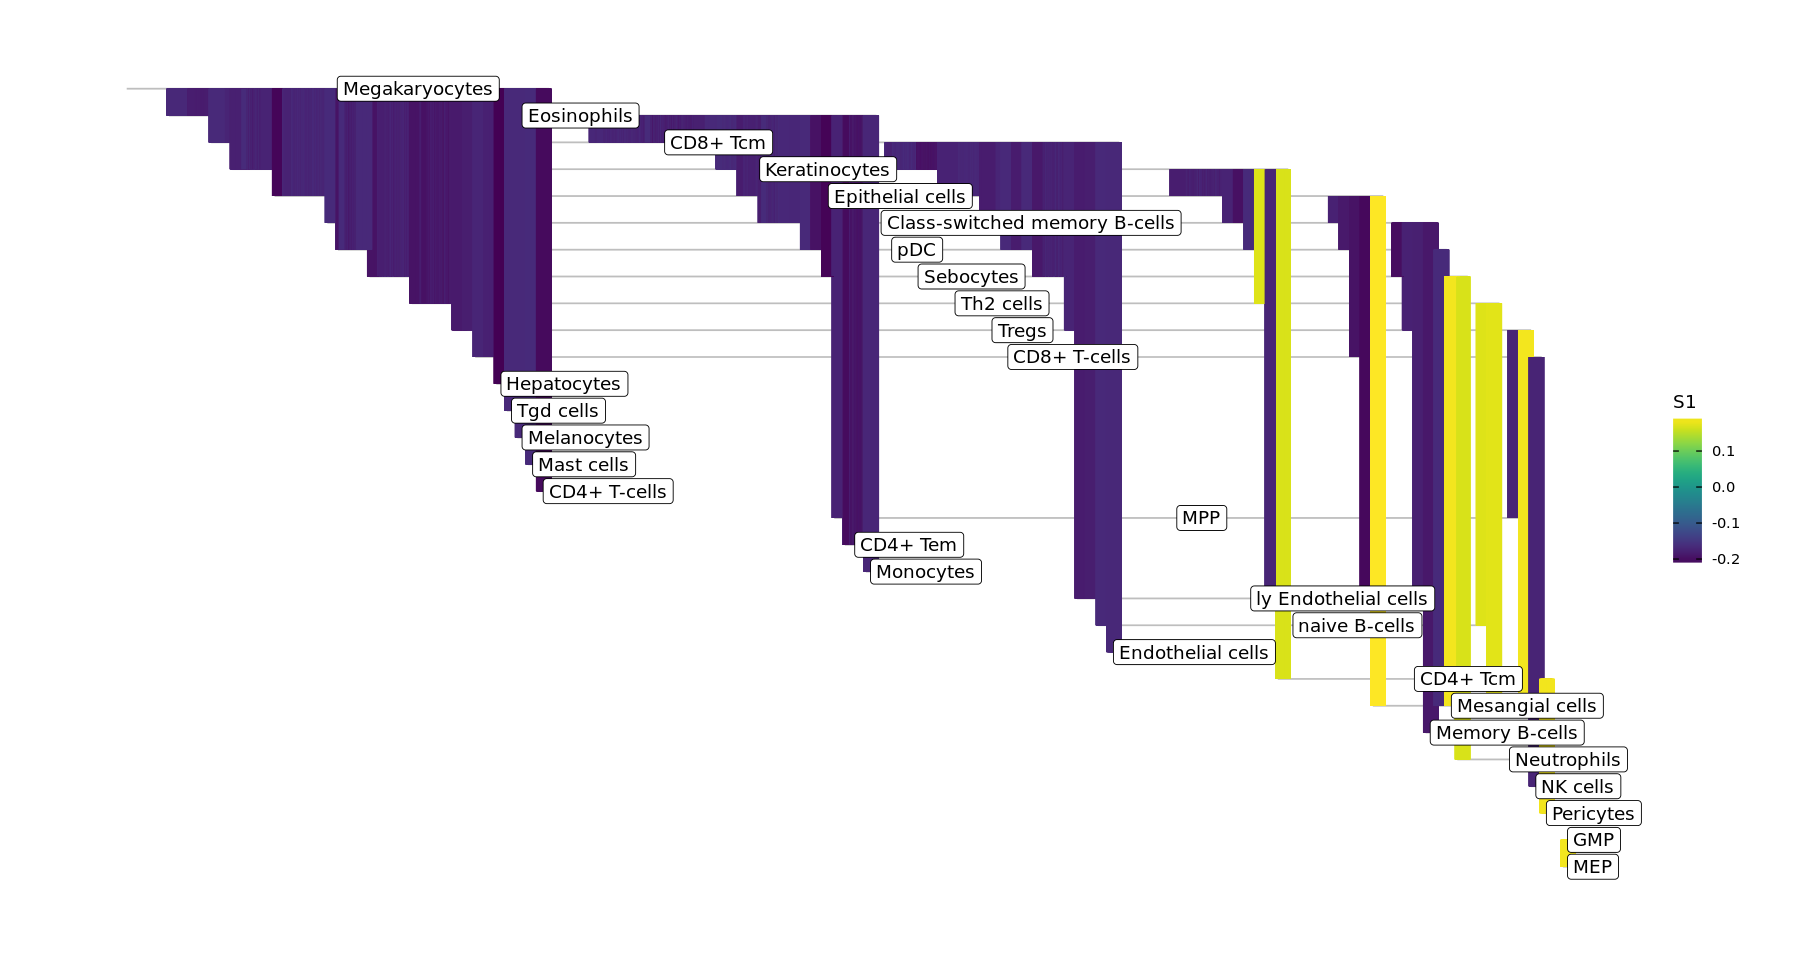

In [30]:

options(repr.plot.width=15, repr.plot.height=8)

ggraph(g, layout='fabric', sort.by = node_rank_fabric()) +
  geom_node_range(colour = 'grey') +
  geom_edge_span(end_shape = 'square', edge_width=1.5, mapping = aes(colour=S1)) +
  scale_edge_colour_viridis() +
  theme_graph() +
  geom_node_label(aes( label = name), hjust = 0, nudge_x = -10)

ggsave('esca_net.png', width=15, height=8)

In [17]:
g

IGRAPH 9f65467 DNW- 30 23290 -- 
+ attr: name (v/c), ligand (e/c), receptor (e/c), S1 (e/n), Med_diff
| (e/n), Study (e/c), weight (e/n)
+ edges from 9f65467 (vertex names):
 [1] Megakaryocytes  ->Eosinophils      Megakaryocytes  ->Megakaryocytes  
 [3] CD8+ Tcm        ->Megakaryocytes   CD8+ T-cells    ->Megakaryocytes  
 [5] Eosinophils     ->CD8+ Tcm         Keratinocytes   ->Keratinocytes   
 [7] Tregs           ->CD8+ Tcm         Keratinocytes   ->Th2 cells       
 [9] Epithelial cells->Epithelial cells Eosinophils     ->Eosinophils     
[11] pDC             ->Megakaryocytes   Keratinocytes   ->Keratinocytes   
[13] Neutrophils     ->Sebocytes        CD8+ T-cells    ->Megakaryocytes  
+ ... omitted several edges

In [18]:
indegree  <- igraph::degree(g, mode = 'in')
outdegree <- igraph::degree(g, mode = 'out')
all(names(indegree) == names(outdegree))
data.frame(indegree, outdegree, indegree+outdegree)


[1] TRUE

,indegree,outdegree,indegree...outdegree
,<dbl>,<dbl>,<dbl>
Megakaryocytes,3570,3910,7480
CD8+ Tcm,3910,2550,6460
CD8+ T-cells,510,170,680
Eosinophils,2210,4420,6630
Keratinocytes,2720,2720,5440
Tregs,850,510,1360
Epithelial cells,2550,2380,4930
pDC,510,1360,1870
Neutrophils,170,340,510


In [19]:
igraph::articulation_points(g)

+ 8/30 vertices, named, from 9f65467:
[1] CD8+ T-cells                  Sebocytes                    
[3] Class-switched memory B-cells CD4+ Tcm                     
[5] Keratinocytes                 Eosinophils                  
[7] CD8+ Tcm                      Megakaryocytes               

In [20]:
clus1 <- igraph::cluster_label_prop(g)
clusdf1 <- data.frame(clus1$names, clus1$membership)

In [21]:
clus2 <- igraph::cluster_infomap(g)
clusdf2 <- data.frame(clus2$names, clus2$membership)

In [22]:
clusRes <- dplyr::inner_join(clusdf1, clusdf2, by=c('clus1.names' = 'clus2.names'))
clusRes

clus1.names,clus1.membership,clus2.membership
<chr>,<dbl>,<dbl>
Megakaryocytes,1,1
CD8+ Tcm,1,1
CD8+ T-cells,1,1
Eosinophils,1,1
Keratinocytes,1,1
Tregs,1,1
Epithelial cells,1,1
pDC,1,1
Neutrophils,2,1


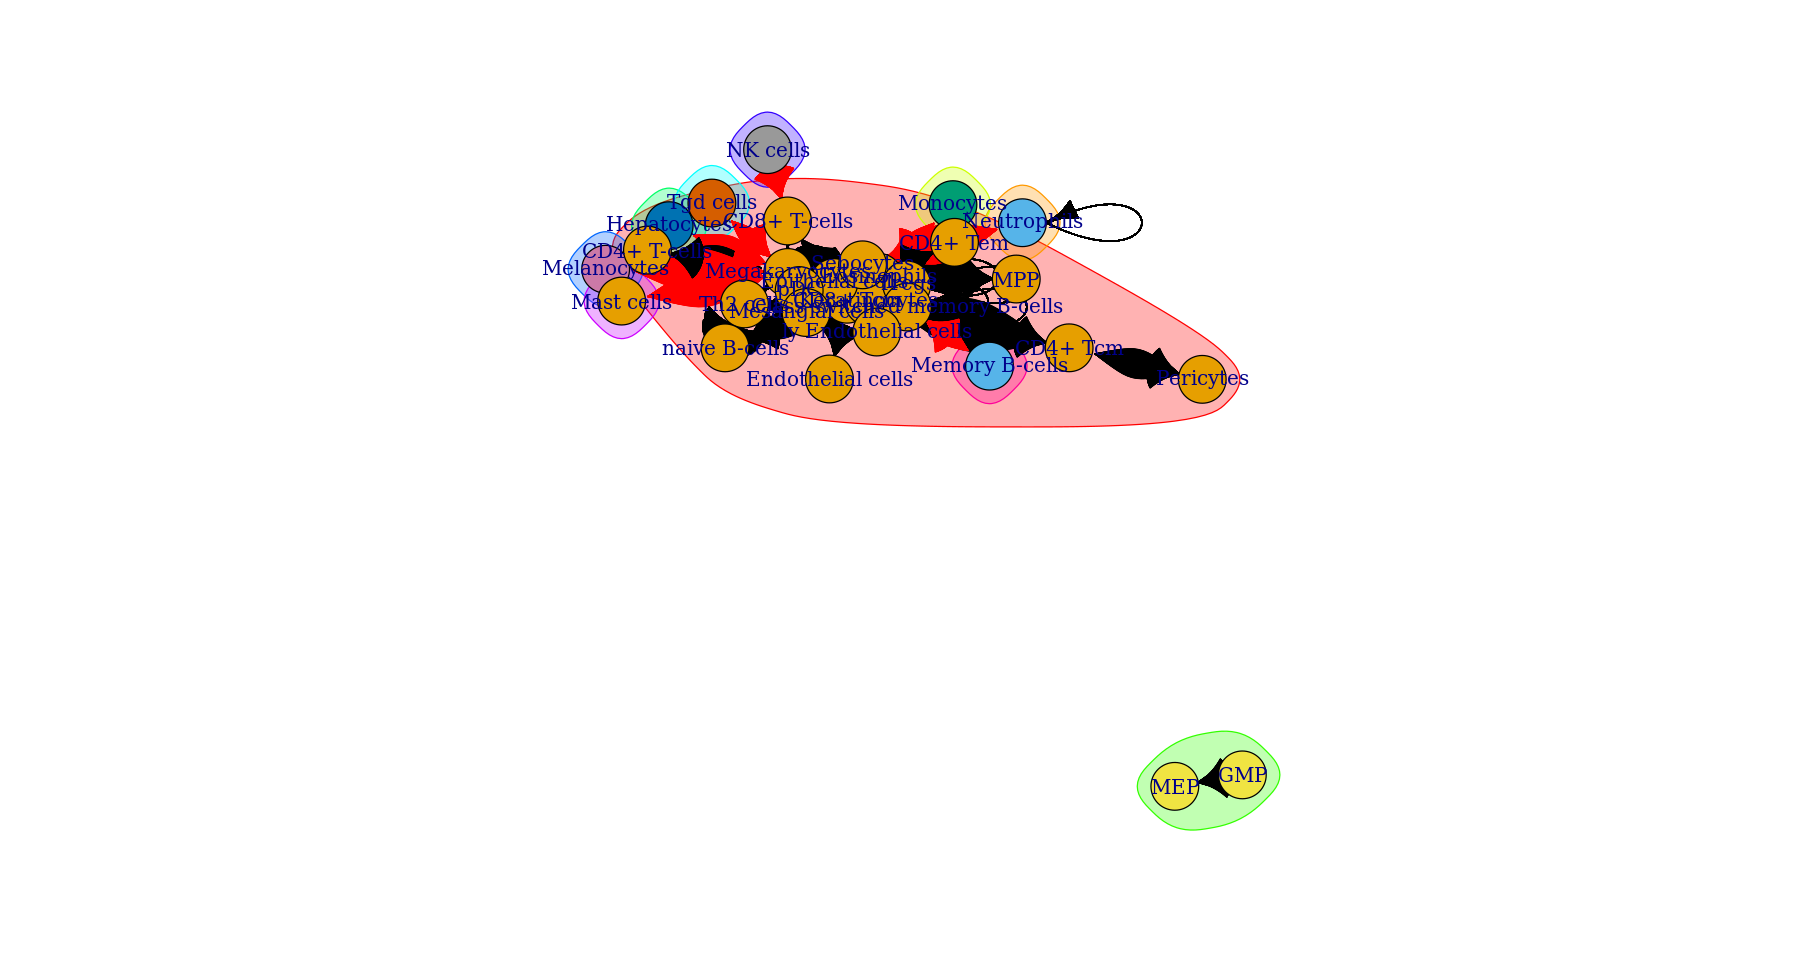

In [23]:
plot(clus1, y=g)

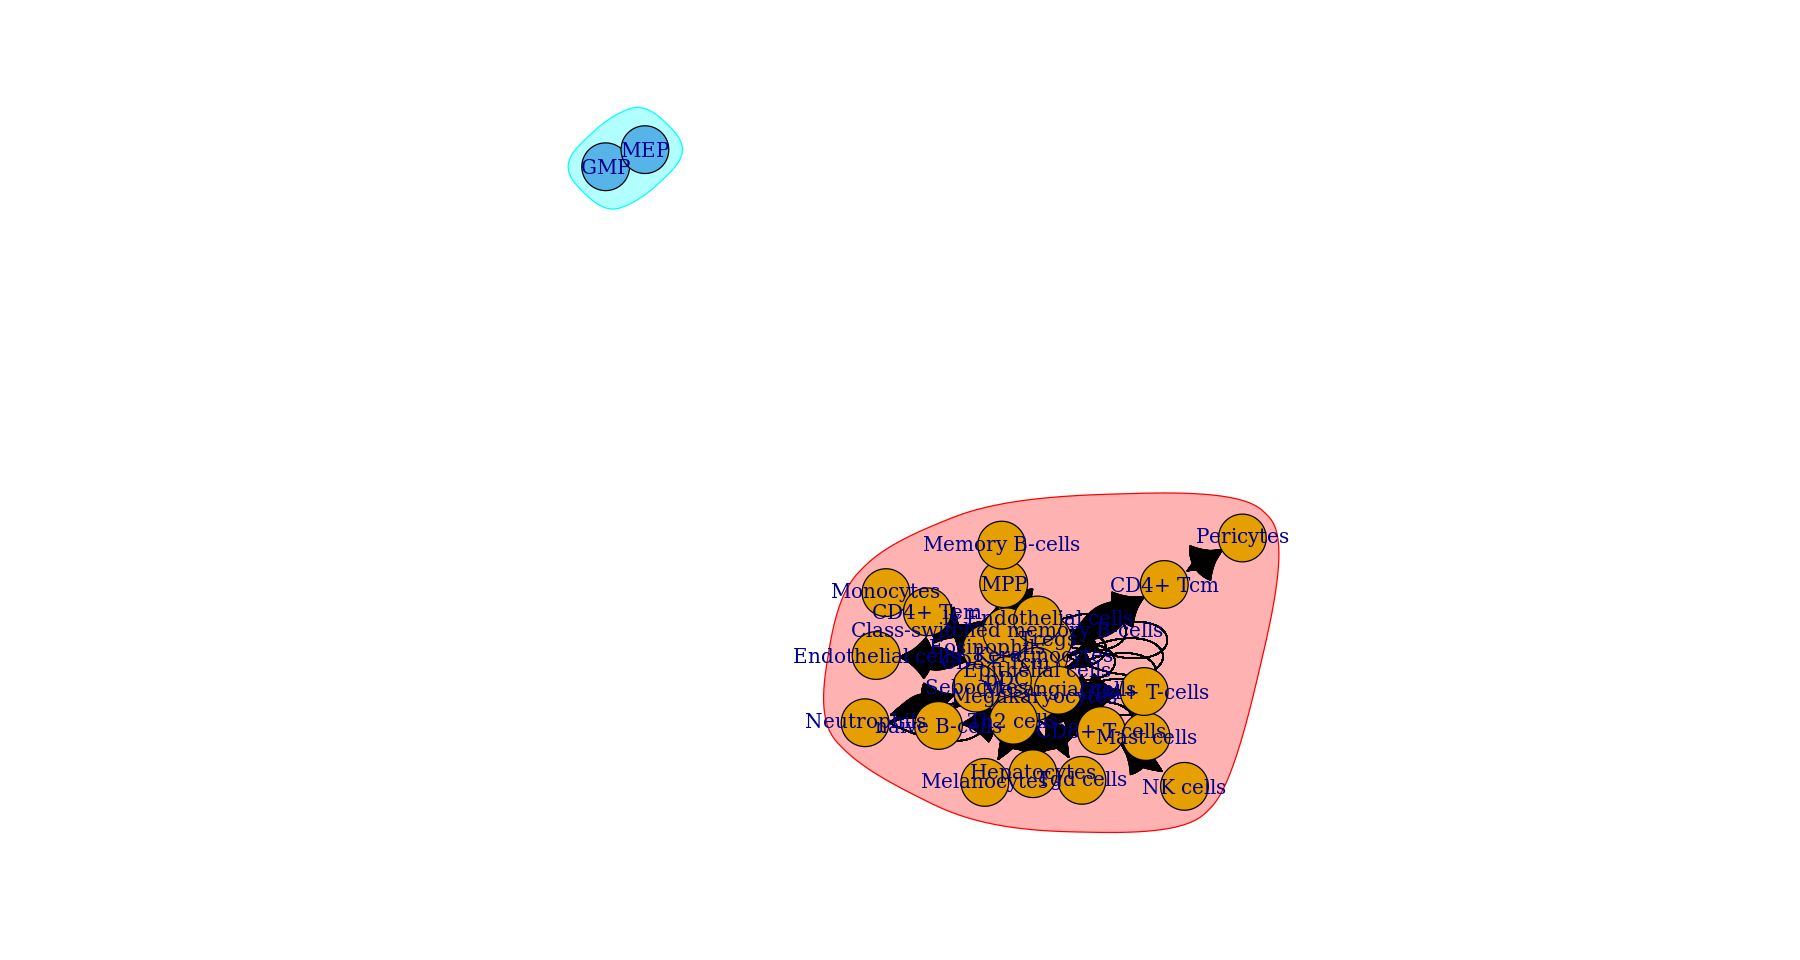

In [24]:
plot(clus2, y=g)

In [25]:
igraph::compare(clus1, clus2, method='nmi')

[1] 0.3056348

In [26]:
 V(g)[1]

+ 1/30 vertex, named, from 9f65467:
[1] Megakaryocytes

In [27]:
mstg <- (igraph::minimum.spanning.tree(g, weights = (1.0/E(g)$weight) ))

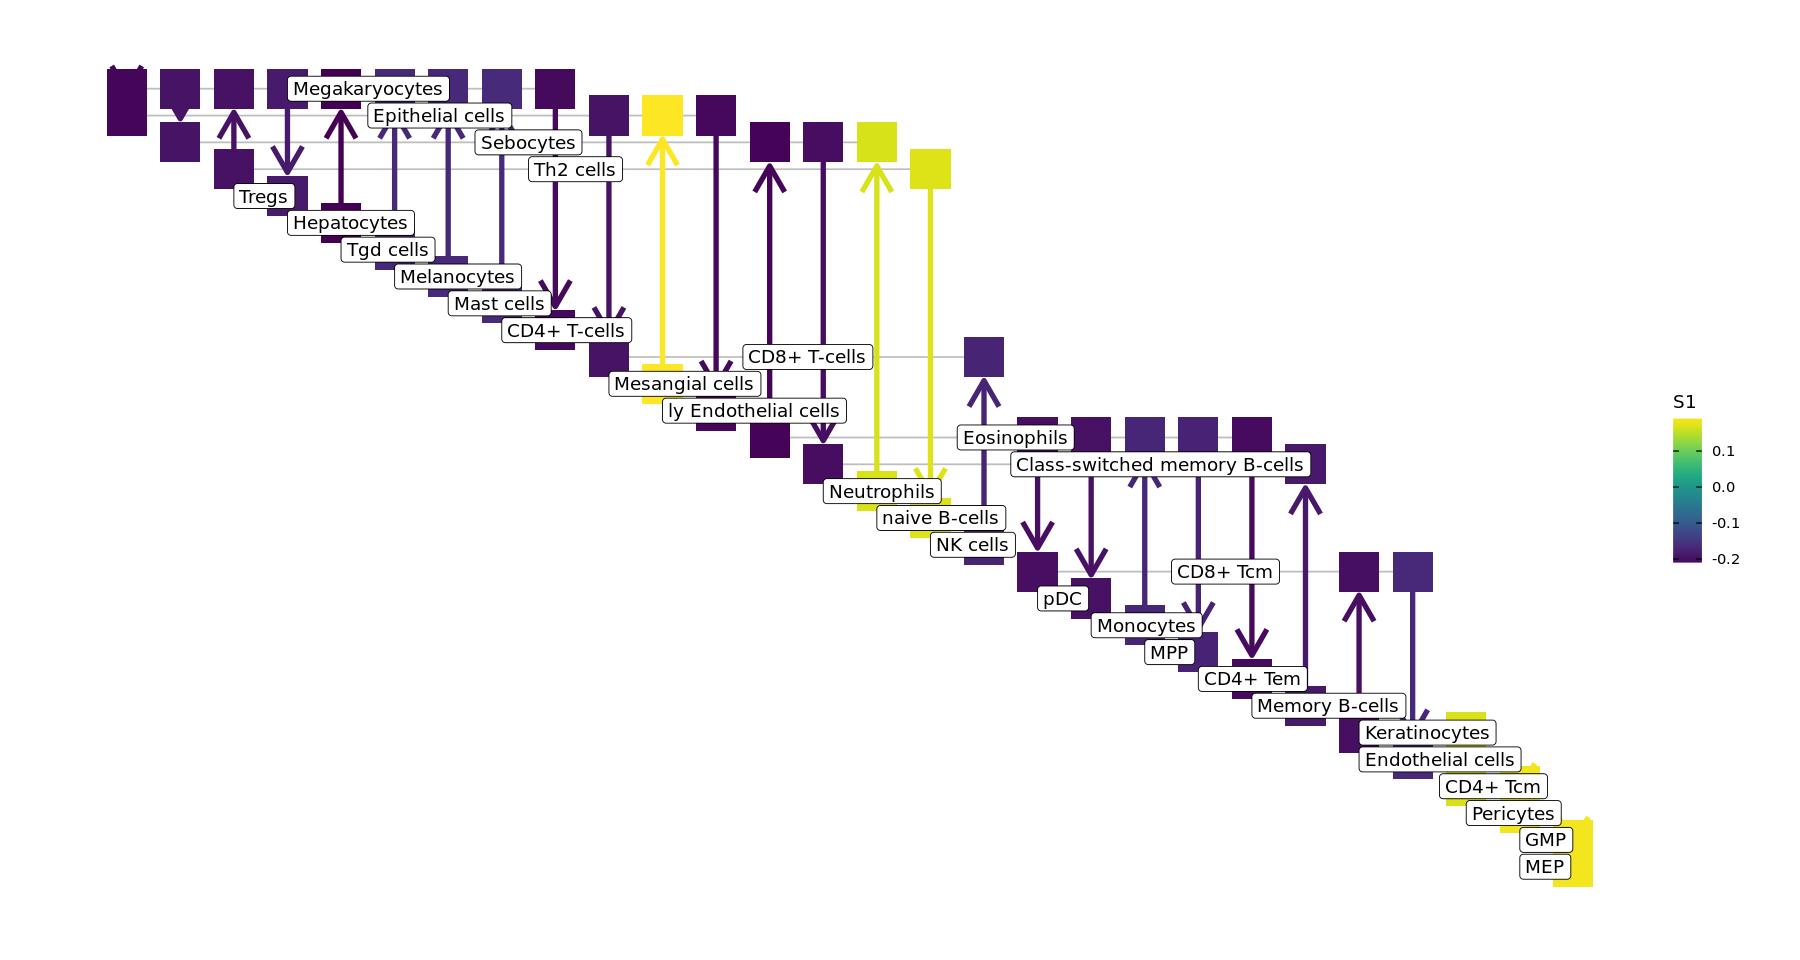

In [28]:
ggraph(mstg, layout='fabric', sort.by = node_rank_fabric()) +
  geom_node_range(colour = 'grey') +
  geom_edge_span(end_shape = 'square', edge_width=1.5, mapping = aes(colour=S1), end_cap = circle(0.5, 'cm'), arrow = arrow()) +
  scale_edge_colour_viridis() +
  theme_graph() +
  geom_node_label(aes(label = name), hjust = 0, nudge_x = -1)

In [29]:
eigg <- igraph::eigen_centrality(g, directed = T)
sort(eigg$vector)

Warning message in igraph::eigen_centrality(g, directed = T):
“At centrality.c:362 :Weighted directed graph in eigenvector centrality”


Neutrophils                     Monocytes 
                  0.000000000                   0.000000000 
                          GMP                   Hepatocytes 
                  0.000000000                   0.000000000 
                    Tgd cells                   Melanocytes 
                  0.000000000                   0.000000000 
                     NK cells                    Mast cells 
                  0.000000000                   0.000000000 
               Memory B-cells                           MEP 
                  0.000000000                   0.000000000 
                    Pericytes               Mesangial cells 
                  0.005084268                   0.012326360 
                          MPP                  CD4+ T-cells 
                  0.044400900                   0.057243991 
                     CD4+ Tcm             Endothelial cells 
                  0.065423225                   0.071875503 
                naive B-cells                      CD4+ Tem 
                  0.084553094                   0.096232028 
                 CD8+ T-cells                         Tregs 
                  0.114908640                   0.115513575 
                          pDC                     Th2 cells 
                  0.174340220                   0.185006684 
         ly Endothelial cells                     Sebocytes 
                  0.214156236                   0.240495817 
Class-switched memory B-cells                   Eosinophils 
                  0.478899280                   0.591379132 
               Megakaryocytes              Epithelial cells 
                  0.658758770                   0.785220903 
                Keratinocytes                      CD8+ Tcm 
                  0.922140256                   1.000000000

In [60]:
phen <- read_csv('../../Data/pancancer_clinical_extra_endpoints_mmc1.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  bcr_patient_barcode = col_character(),
  type = col_character(),
  PFI.1 = col_double(),
  PFI.time.1 = col_double(),
  PFI.2 = col_character(),
  PFI.time.2 = col_character(),
  PFS = col_double(),
  PFS.time = col_double(),
  DSS_cr = col_character(),
  DSS.time.cr = col_character(),
  DFI.cr = col_character(),
  DFI.time.cr = col_character(),
  PFI.cr = col_double(),
  PFI.time.cr = col_double(),
  PFI.1.cr = col_double(),
  PFI.time.1.cr = col_double(),
  PFI.2.cr = col_character(),
  PFI.time.2.cr = col_character()
)

Warning message:
“1844 parsing failures.
 row           col expected actual                                                     file
1563 PFI.time.1    a double   #N/A '../../Data/pancancer_clinical_extra_endpoints_mmc1.csv'
1563 PFS.time      a double   #N/A '../../Data/pancancer_clinical_extra_endpoints_mmc1.csv'
1563 PFI.time.cr   a double   #

In [61]:
wts <- read_csv('../../Results//esca_edge_344989.csv')

Parsed with column specification:
cols(
  AliquotBarcode = col_character(),
  PatientBarcode = col_character(),
  Study = col_character(),
  SampleID = col_double(),
  Stage = col_double(),
  PFI = col_double(),
  SampleID_1 = col_double(),
  EdgeID = col_double(),
  EdgeWt = col_double()
)



In [64]:
res2 <- dplyr::inner_join(res0, phen, by=c('PatientBarcode'='bcr_patient_barcode'))
res3 <- dplyr::inner_join(res2, wts)

Joining, by = c("Study", "EdgeID", "AliquotBarcode", "PatientBarcode", "EdgeWt", "Stage", "PFI")



In [65]:
colnames(res3)

[1] "Study"          "EdgeID"         "LCell"          "Ligand"        
 [5] "Receptor"       "RCell"          "S1"             "med_diff"      
 [9] "AliquotBarcode" "PatientBarcode" "EdgeWt"         "Stage"         
[13] "PFI"            "X1"             "type"           "PFI.1"         
[17] "PFI.time.1"     "PFI.2"          "PFI.time.2"     "PFS"           
[21] "PFS.time"       "DSS_cr"         "DSS.time.cr"    "DFI.cr"        
[25] "DFI.time.cr"    "PFI.cr"         "PFI.time.cr"    "PFI.1.cr"      
[29] "PFI.time.1.cr"  "PFI.2.cr"       "PFI.time.2.cr"  "SampleID"      
[33] "SampleID_1"

In [68]:
res3 %>% select(EdgeID, S1, med_diff, EdgeWt, Stage, Stage, PFI, PFI.time.1) %>% head()

EdgeID,S1,med_diff,EdgeWt,Stage,PFI,PFI.time.1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
344989,-0.2159801,-0.1315073,0.10892827,2,2,362
344989,-0.2159801,-0.1315073,0.09743577,1,2,2532
344989,-0.2159801,-0.1315073,0.19035793,1,2,832
344989,-0.2159801,-0.1315073,0.85789456,1,1,24
344989,-0.2159801,-0.1315073,0.09172373,NA,1,160
344989,-0.2159801,-0.1315073,0.51099330,2,2,1590


In [70]:
dim(res3)

[1] 170  33

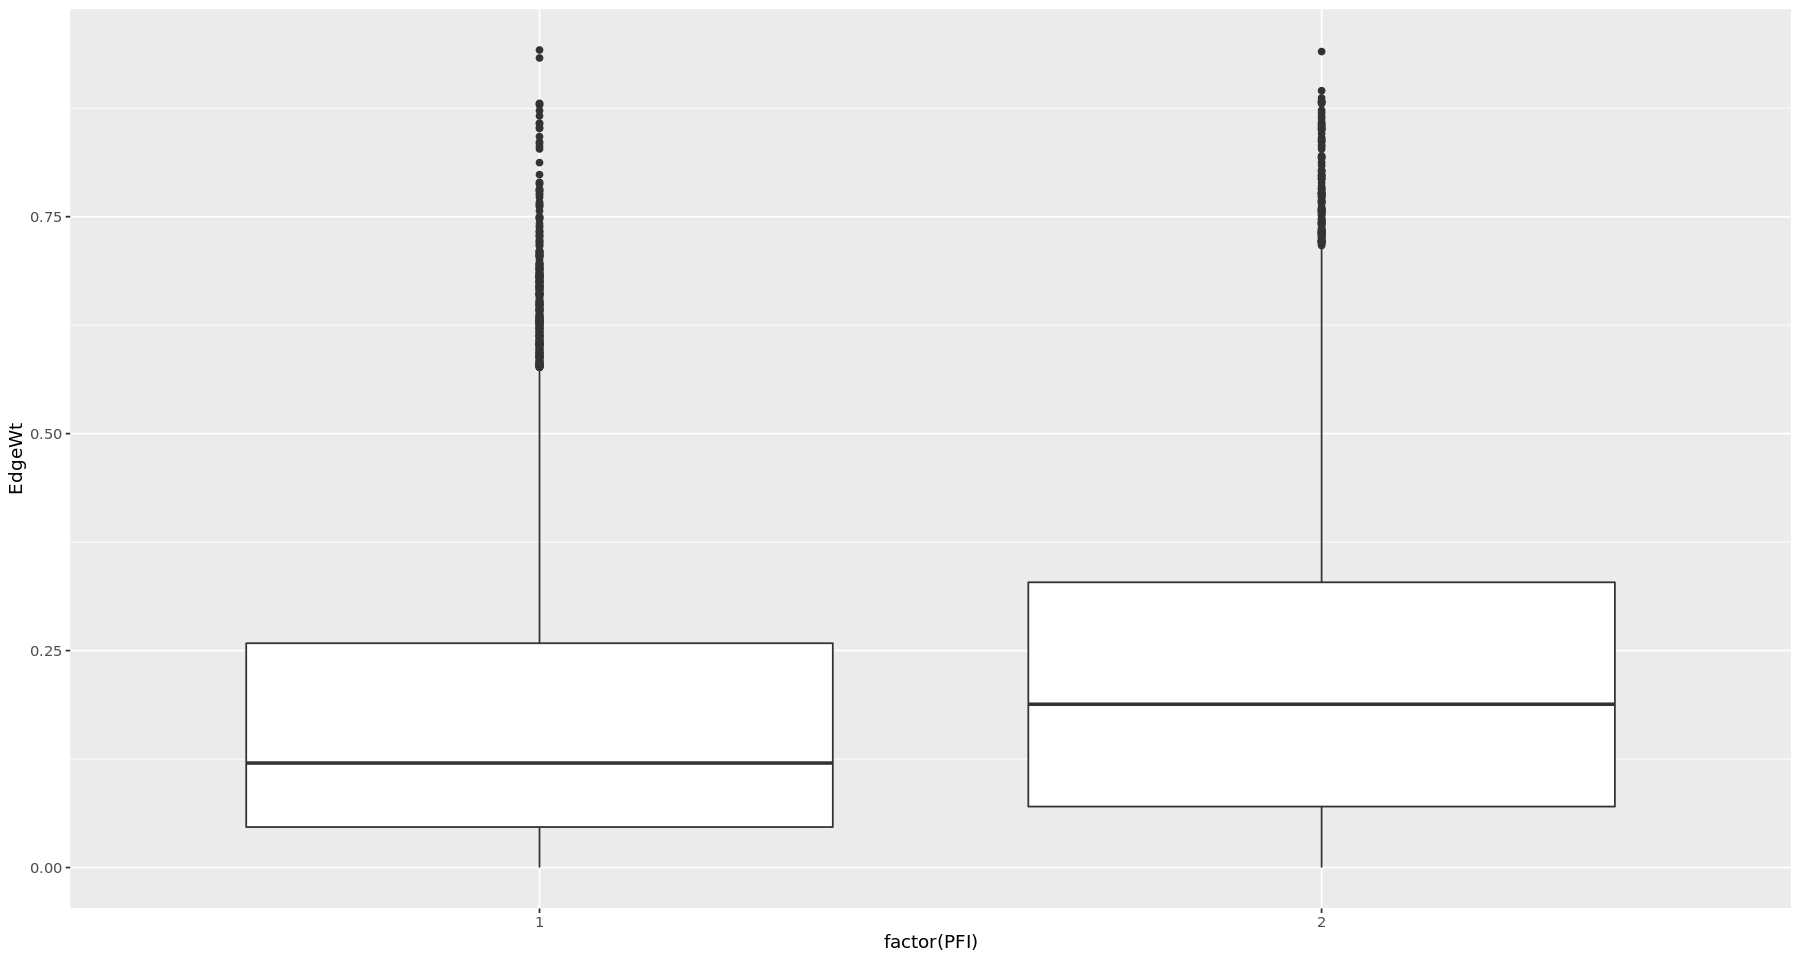

In [74]:
ggplot2::qplot(data=res2, x=factor(PFI), y=EdgeWt, geom='boxplot')